<a href="https://colab.research.google.com/github/mprksa/Blocks2/blob/main/KNN5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mprksa/Blocks2.git

Cloning into 'Blocks2'...
remote: Enumerating objects: 884, done.
remote: Counting objects: 100% (884/884), done.
remote: Compressing objects: 100% (870/870), done.
remote: Total 884 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (884/884), 1.82 GiB | 23.59 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Updating files: 100% (728/728), done.


# **1. Muat dan Preprocess Data**

In [26]:
import os
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [27]:
# Fungsi untuk memuat gambar dan label
def load_data(image_folder, label_file, image_size=(256, 256)):
    images = []
    labels = []

    with open(label_file, 'r') as f:
        data = json.load(f)

    # Create a dictionary to map image_id to file_name
    image_id_to_filename = {image['id']: image['file_name'] for image in data['images']}
    # Create a dictionary to map category_id to category_name
    category_id_to_name = {category['id']: category['name'] for category in data['categories']}

    for annotation in data['annotations']:
        image_id = annotation['image_id']
        category_id = annotation['category_id']

        img_path = os.path.join(image_folder, image_id_to_filename[image_id])
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                images.append(img_hsv)
                labels.append(category_id_to_name[category_id])

    return np.array(images), np.array(labels)

In [23]:
# Muat data
train_images, train_labels = load_data('Blocks2/train/images', 'Blocks2/train/labels.json')
test_images, test_labels = load_data('Blocks2/test/images', 'Blocks2/test/labels.json')
val_images, val_labels = load_data('Blocks2/validation/images', 'Blocks2/validation/labels.json')

# Tampilkan jumlah gambar
print(f"Jumlah gambar untuk pelatihan: {len(train_images)}")
print(f"Jumlah gambar untuk testing: {len(test_images)}")
print(f"Jumlah gambar untuk validasi: {len(val_images)}")

Jumlah gambar untuk pelatihan: 508
Jumlah gambar untuk testing: 72
Jumlah gambar untuk validasi: 144


# **2. Ekstraksi Fitur dan Pelatihan Model K-NN**

In [28]:
# Ekstraksi fitur H, S, dan V
def extract_features(images):
    features = []
    for img in images:
        h, s, v = cv2.split(img)
        features.append([np.mean(h), np.mean(s), np.mean(v)])
    return np.array(features)

def train_knn(train_features, train_labels, val_features, val_labels, epochs=10):
    knn = KNeighborsClassifier(n_neighbors=3)

    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Training model K-NN dengan data latihan
        knn.fit(train_features, train_labels)

        # Evaluasi pada data pelatihan dan validasi
        train_predictions = knn.predict(train_features)
        val_predictions = knn.predict(val_features)

        train_accuracy = accuracy_score(train_labels, train_predictions)
        val_accuracy = accuracy_score(val_labels, val_predictions)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Akurasi Pelatihan: {train_accuracy:.4f} | Akurasi Validasi: {val_accuracy:.4f}")

    return knn, train_accuracies, val_accuracies

In [30]:
# Ekstraksi fitur untuk setiap dataset
train_features = extract_features(train_images)
test_features = extract_features(test_images)
val_features = extract_features(val_images)

# Training model dengan epoch dan step per epoch
epochs = 10

knn_model, train_accuracies, val_accuracies = train_knn(train_features, train_labels, val_features, val_labels, epochs=epochs)

Epoch 1/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 2/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 3/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 4/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 5/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 6/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 7/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 8/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 9/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708
Epoch 10/10
Akurasi Pelatihan: 0.7402 | Akurasi Validasi: 0.2708


In [9]:
# Pelatihan model K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Evaluasi model
train_predictions = knn.predict(train_features)
test_predictions = knn.predict(test_features)
val_predictions = knn.predict(val_features)

In [11]:
# Tampilkan hasil pelatihan
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)

print(f"Akurasi Pelatihan: {train_accuracy}")
print(f"Akurasi Testing: {test_accuracy}")
print(f"Akurasi Validasi: {val_accuracy}")

Akurasi Pelatihan: 0.7401574803149606
Akurasi Testing: 0.09722222222222222
Akurasi Validasi: 0.2708333333333333


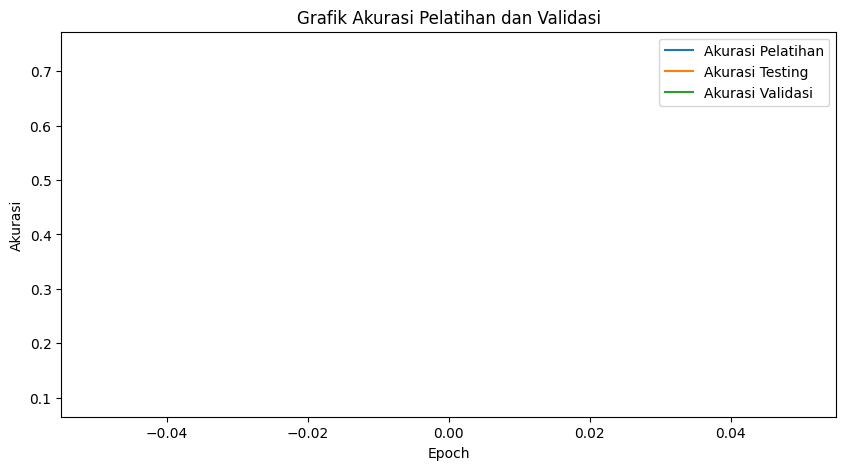

In [12]:
# Plot grafik hasil pelatihan dan validasi
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Akurasi Pelatihan')
plt.plot(test_accuracy, label='Akurasi Testing')
plt.plot(val_accuracy, label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Pelatihan dan Validasi')
plt.legend()
plt.show()

# **3. Export Model**

In [ ]:
import joblib

# Simpan model K-NN
joblib.dump(knn, 'knn_model.pkl')


# **4. Analisis dan Laporan**

In [13]:
# Hitung rata-rata H, S, dan V untuk setiap kelas
unique_labels = np.unique(train_labels)
class_hsv_means = {}

for label in unique_labels:
    class_indices = np.where(train_labels == label)
    class_features = train_features[class_indices]
    class_hsv_means[label] = np.mean(class_features, axis=0)

# Tampilkan dalam bentuk tabel menggunakan pandas
df = pd.DataFrame(class_hsv_means, index=['Rata-rata H', 'Rata-rata S', 'Rata-rata V'])
print(df)

Rata-rata H, S, V untuk kelas biru: [ 37.86565165  52.37085565 129.74368996]
Rata-rata H, S, V untuk kelas hitam: [ 31.49118042  44.34113686 130.34743575]
Rata-rata H, S, V untuk kelas kuning: [ 30.93372195  55.05349253 125.00416221]
Rata-rata H, S, V untuk kelas merah: [ 30.72375156  54.94794517 132.26138004]
Rata-rata H, S, V untuk kelas putih: [ 31.85866262  46.74470774 123.00552862]


In [14]:
# Tampilkan classification report dan confusion matrix
val_class_report = classification_report(val_labels, val_predictions)
val_conf_matrix = confusion_matrix(val_labels, val_predictions)

In [15]:
print("Classification Report untuk Validasi:")
print(val_class_report)

Classification Report untuk Validasi:
              precision    recall  f1-score   support

        biru       0.29      0.48      0.36        29
       hitam       0.31      0.62      0.41        29
      kuning       0.10      0.04      0.05        28
       merah       0.28      0.17      0.21        29
       putih       0.11      0.03      0.05        29

    accuracy                           0.27       144
   macro avg       0.22      0.27      0.22       144
weighted avg       0.22      0.27      0.22       144



In [16]:
print("Confusion Matrix untuk Validasi:")
print(val_conf_matrix)

Confusion Matrix untuk Validasi:
[[14  3  0  5  7]
 [ 5 18  6  0  0]
 [10 14  1  3  0]
 [13 10  0  5  1]
 [ 6 14  3  5  1]]


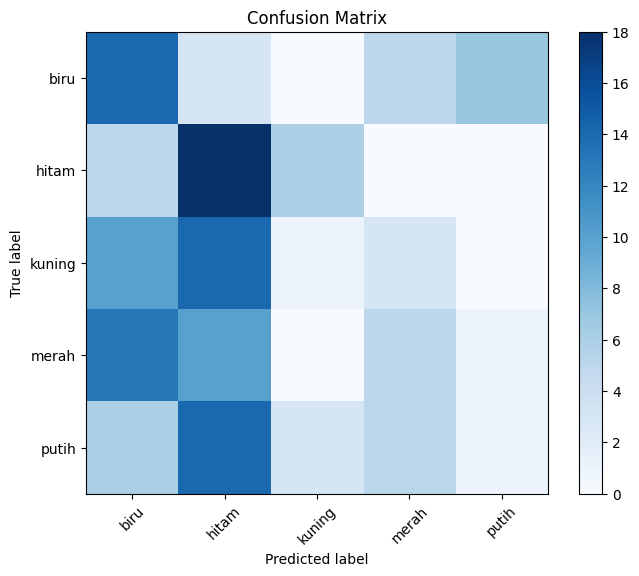

In [17]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(val_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()